In [87]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns

In [88]:
def calculate_rolling_mean(data, n):
    weights = np.ones(n) / n
    return np.convolve(data, weights, mode='same')

def compute_moving_avarage(arr, window):
    if window == 0:
        return [0] * len(arr)
    res = np.cumsum(arr)
    res[window:] -= res[:-window]
    return res[window - 1:] / window

In [131]:
def puassonProcess(l, n, N):
    if N == 0:
        return ([], [])
    prob = min(l / n, 1)
    print(f"prob is {prob}")
    successes_lst = []
    success_distances = []
    for i in range(N):
        successes = 0
        suc_pos = -1
        for j in range(n):
            if random.uniform(0.0, 1.0) < prob:
                successes += 1
                if suc_pos < 0:
                    suc_pos = j
                else:
                    success_distances.append(j - suc_pos)
                    suc_pos = j
        successes_lst.append(successes)
    # print(successes_lst)
    plt.figure(figsize=(6, 10))
    gs = gridspec.GridSpec(2, 1)
    plt.subplot(gs[0])
    plt.hist(successes_lst, bins=range(min(successes_lst), max(successes_lst) + 1), ec="black", color="green")
    # rolling_mean_first = calculate_rolling_mean(successes_lst, 2)[:N]
    # plt.plot(rolling_mean_first, color='orange', linestyle='dashed', linewidth=2, label='Скользящее среднее')
    # plt.legend()
    # plt.figure(figsize=(1, 2))
    
    plt.title(f"Количество успехов за {N} испытаний")
    plt.xlabel("количество успехов за одну итерацию")
    plt.ylabel("сколько раз было x успехов за все итерации")
    
    for i, value in enumerate(successes_lst):
        num = successes_lst.count(value)
        plt.text(value, num, str(num), color="red", fontdict={'weight': 100, 'size': 10})
        
        
    plt.subplot(gs[1])
    # print(success_distances)
    # print(min(success_distances), max(success_distances))
    plt.hist(success_distances, bins=range(min(success_distances), max(success_distances) + 1), ec="black", color="blue")
    rolling_mean_second = compute_moving_avarage(success_distances, 10)[:len(success_distances)]
    # plt.plot(np.arange(len(rolling_mean_second)), rolling_mean_second, color='purple', linestyle='dashed', linewidth=2, label='Скользящее среднее')
    # plt.legend()
    # sns.distplot(success_distances, bins=range(min(success_distances), max(success_distances) + 1), hist=True, kde=True, color = 'darkblue', 
    #          hist_kws={'edgecolor':'black'},
    #          kde_kws={'linewidth': 4})
    
    plt.title(f"Расстояния между успехами")
    plt.xlabel("Расстояние")
    plt.ylabel("Сколько раз оно встречалось")
    
    for i, value in enumerate(success_distances):
        num = success_distances.count(value)
        plt.text(value, num, str(num), color="red", fontdict={'weight': 100, 'size': 10})
    
    
    plt.tight_layout()
    plt.show()
    return successes_lst, success_distances

prob is 0.01


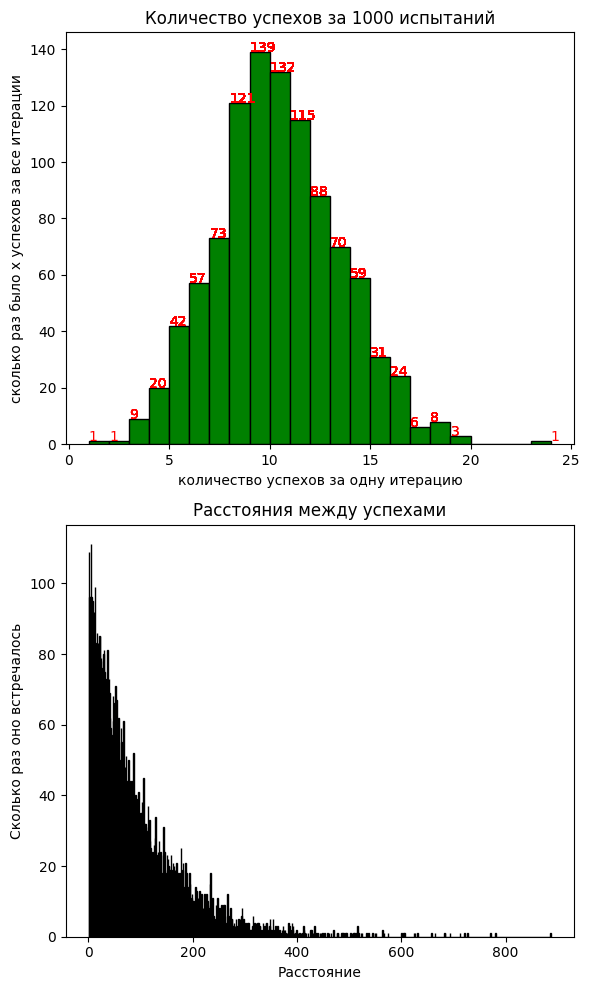

([13,
  10,
  7,
  12,
  16,
  9,
  8,
  16,
  10,
  7,
  13,
  5,
  11,
  9,
  11,
  4,
  10,
  9,
  7,
  9,
  11,
  8,
  8,
  11,
  11,
  14,
  12,
  9,
  7,
  8,
  19,
  6,
  10,
  8,
  11,
  12,
  10,
  7,
  13,
  10,
  8,
  10,
  7,
  7,
  11,
  8,
  15,
  6,
  15,
  8,
  12,
  9,
  10,
  11,
  12,
  13,
  8,
  7,
  9,
  12,
  9,
  12,
  10,
  13,
  8,
  9,
  11,
  8,
  5,
  10,
  9,
  10,
  10,
  7,
  10,
  11,
  8,
  12,
  15,
  7,
  12,
  9,
  11,
  6,
  8,
  14,
  11,
  5,
  14,
  6,
  6,
  4,
  7,
  12,
  6,
  9,
  4,
  9,
  11,
  12,
  13,
  7,
  5,
  9,
  9,
  8,
  14,
  8,
  16,
  16,
  8,
  14,
  13,
  15,
  7,
  10,
  12,
  6,
  14,
  12,
  12,
  12,
  12,
  10,
  13,
  10,
  7,
  8,
  12,
  14,
  14,
  14,
  7,
  11,
  11,
  8,
  9,
  8,
  9,
  11,
  12,
  10,
  13,
  8,
  7,
  11,
  15,
  10,
  2,
  10,
  7,
  8,
  10,
  11,
  8,
  11,
  3,
  14,
  9,
  8,
  11,
  10,
  10,
  11,
  13,
  9,
  13,
  10,
  5,
  8,
  11,
  16,
  9,
  8,
  6,
  9,
  8,
  11,
  13,
  7,
  1

In [127]:
puassonProcess(10, 10000, 10000)

prob is 0.01


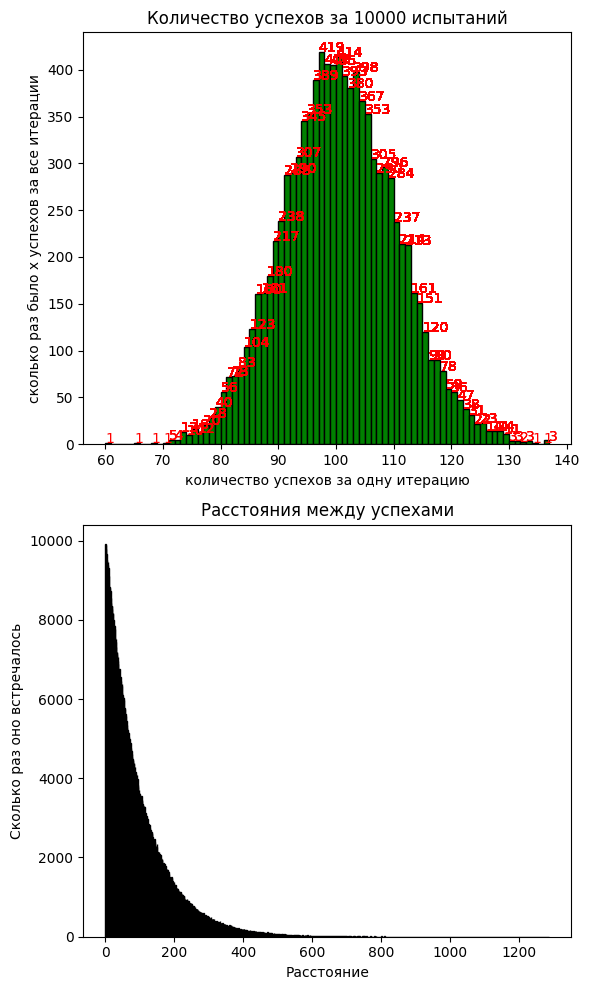

([100,
  97,
  96,
  117,
  102,
  107,
  84,
  92,
  98,
  99,
  95,
  91,
  94,
  91,
  93,
  95,
  101,
  98,
  120,
  104,
  91,
  106,
  88,
  107,
  100,
  105,
  99,
  77,
  110,
  89,
  89,
  105,
  92,
  99,
  97,
  82,
  103,
  86,
  91,
  104,
  93,
  102,
  109,
  88,
  98,
  94,
  90,
  101,
  96,
  109,
  116,
  99,
  109,
  103,
  104,
  102,
  119,
  103,
  110,
  94,
  88,
  100,
  97,
  107,
  77,
  104,
  109,
  85,
  126,
  108,
  88,
  104,
  111,
  121,
  88,
  86,
  97,
  101,
  108,
  95,
  107,
  87,
  99,
  120,
  92,
  94,
  108,
  85,
  92,
  102,
  106,
  98,
  95,
  100,
  97,
  90,
  98,
  100,
  99,
  107,
  91,
  126,
  89,
  89,
  100,
  100,
  89,
  99,
  78,
  99,
  92,
  100,
  83,
  82,
  105,
  97,
  118,
  108,
  103,
  92,
  107,
  74,
  98,
  108,
  89,
  104,
  87,
  109,
  97,
  104,
  110,
  95,
  114,
  110,
  88,
  102,
  104,
  108,
  113,
  99,
  94,
  94,
  90,
  97,
  89,
  85,
  102,
  101,
  114,
  107,
  92,
  88,
  98,
  84,
  123,

In [130]:
puassonProcess(100, 10000, 10000)

prob is 0.5


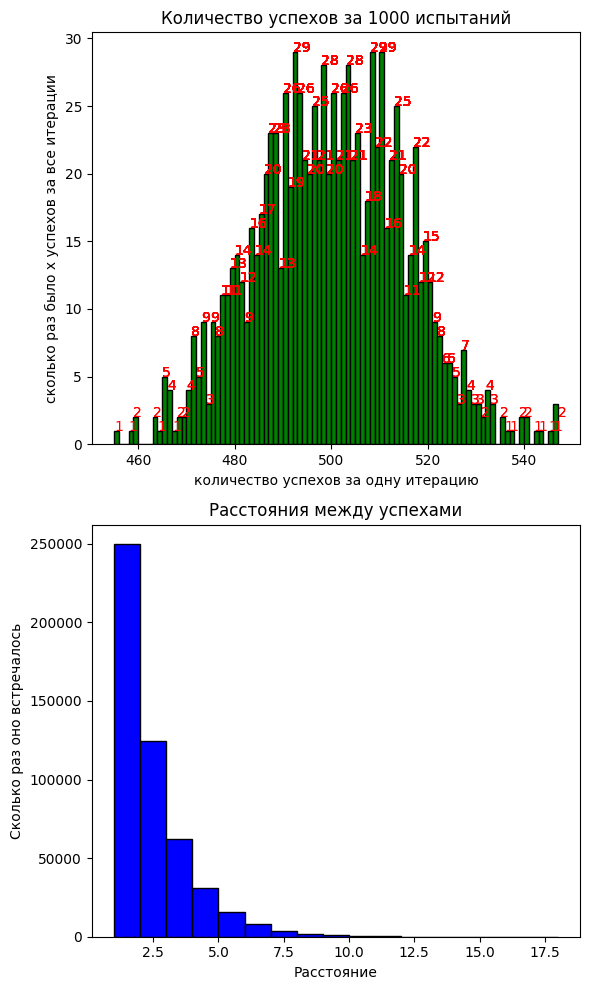

([478,
  514,
  498,
  493,
  500,
  481,
  501,
  485,
  494,
  502,
  510,
  471,
  511,
  494,
  514,
  496,
  493,
  489,
  491,
  505,
  491,
  511,
  510,
  497,
  503,
  507,
  487,
  496,
  511,
  510,
  479,
  520,
  517,
  506,
  510,
  507,
  494,
  505,
  498,
  505,
  516,
  517,
  498,
  519,
  519,
  487,
  501,
  488,
  492,
  518,
  501,
  480,
  490,
  506,
  501,
  510,
  496,
  493,
  526,
  509,
  492,
  473,
  493,
  468,
  512,
  500,
  510,
  527,
  498,
  517,
  501,
  509,
  480,
  464,
  512,
  496,
  477,
  487,
  520,
  483,
  486,
  502,
  465,
  502,
  532,
  513,
  491,
  489,
  481,
  506,
  508,
  486,
  506,
  485,
  488,
  502,
  505,
  509,
  487,
  487,
  459,
  510,
  521,
  482,
  478,
  514,
  518,
  492,
  503,
  503,
  471,
  503,
  477,
  510,
  496,
  503,
  508,
  520,
  498,
  503,
  470,
  510,
  505,
  483,
  511,
  500,
  547,
  479,
  496,
  510,
  465,
  488,
  489,
  501,
  509,
  496,
  498,
  527,
  495,
  496,
  483,
  512,
  502,

In [129]:
puassonProcess(500, 10000, 10000)